<a href="https://colab.research.google.com/github/deepaksethionly/google_colab/blob/current_work/london_listing_dv_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')

In [ ]:
listing_dv_data=pd.read_csv('/content/drive/MyDrive/london airbnb dataset/listings dv.csv')

In [ ]:
listing_dv_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13913,Rental unit in Islington · ★4.80 · 1 bedroom · 1 bed · 1 shared bath,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,79,1,41,2022-12-11,0.26,2,360,11,NaN
1,15400,Rental unit in London · ★4.80 · 1 bedroom · 1 bed · 1 bath,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,2023-05-01,0.56,1,73,5,NaN
2,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom · 2 beds · 1.5 shared baths,498201,Dee Dee,NaN,Wandsworth,51.44201,-0.18739,Private room,42,2,216,2022-10-29,1.45,1,217,9,NaN
3,17402,Rental unit in London · ★4.76 · 3 bedrooms · 3 beds · 2 baths,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,476,3,54,2022-11-19,0.36,9,300,4,NaN
4,93015,Rental unit in Hammersmith · ★4.82 · 2 bedrooms · 3 beds · 1 bath,499704,Sarah,NaN,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,5,38,2022-09-30,0.27,1,40,2,NaN


In [ ]:
listing_dv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87947 entries, 0 to 87946
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              87947 non-null  int64  
 1   name                            87947 non-null  object 
 2   host_id                         87947 non-null  int64  
 3   host_name                       87941 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   87947 non-null  object 
 6   latitude                        87947 non-null  float64
 7   longitude                       87947 non-null  float64
 8   room_type                       87947 non-null  object 
 9   price                           87947 non-null  int64  
 10  minimum_nights                  87947 non-null  int64  
 11  number_of_reviews               87947 non-null  int64  
 12  last_review                     

In [ ]:
listing_dv_data.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8.794700e+04,8.794700e+04,0.0,87947.000000,87947.000000,87947.000000,87947.000000,87947.000000,65789.000000,87947.000000,87947.000000,87947.000000
mean,3.586483e+17,1.589889e+08,NaN,51.509556,-0.127902,181.349540,5.618009,17.977111,1.014894,18.140755,121.115581,5.797196
std,4.121113e+17,1.694030e+08,NaN,0.048750,0.099646,486.171553,23.571845,42.834747,1.365444,63.744938,134.555850,12.748246
min,1.391300e+04,4.775000e+03,NaN,51.295937,-0.497800,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.215835e+07,2.186737e+07,NaN,51.483370,-0.189177,63.000000,1.000000,0.000000,0.150000,1.000000,0.000000,0.000000
50%,4.935862e+07,8.140585e+07,NaN,51.513780,-0.126400,110.000000,2.000000,4.000000,0.540000,2.000000,65.000000,1.000000
75%,8.164761e+17,2.668197e+08,NaN,51.539420,-0.068066,193.000000,4.000000,16.000000,1.320000,6.000000,249.000000,6.000000
max,9.738958e+17,5.355140e+08,NaN,51.681642,0.295731,80100.000000,1125.000000,1536.000000,50.250000,595.000000,365.000000,594.000000


In [ ]:
listing_dv_data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             6
neighbourhood_group               87947
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       22158
reviews_per_month                 22158
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           87946
dtype: int64

# EDA & Feature Engineering

In [ ]:
listing_dv_data['name'] = listing_dv_data['name'].str.split('·')

In [ ]:
new_cols=['location_name','rating','bedrooms','beds','bathrooms']

listing_dv_data[new_cols]=listing_dv_data['name'].apply(pd.Series)

In [ ]:
listing_dv_data.drop(['id','name','host_id','host_name','neighbourhood_group','license'],axis=1,inplace=True)

In [ ]:
listing_dv_data.head()


,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,location_name,rating,bedrooms,beds,bathrooms
0,Islington,51.56861,-0.11270,Private room,79,1,41,2022-12-11,0.26,2,360,11,Rental unit in Islington,★4.80,1 bedroom,1 bed,1 shared bath
1,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,2023-05-01,0.56,1,73,5,Rental unit in London,★4.80,1 bedroom,1 bed,1 bath
2,Wandsworth,51.44201,-0.18739,Private room,42,2,216,2022-10-29,1.45,1,217,9,Rental unit in Earlsfield,★4.57,1 bedroom,2 beds,1.5 shared baths
3,Westminster,51.52195,-0.14094,Entire home/apt,476,3,54,2022-11-19,0.36,9,300,4,Rental unit in London,★4.76,3 bedrooms,3 beds,2 baths
4,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,5,38,2022-09-30,0.27,1,40,2,Rental unit in Hammersmith,★4.82,2 bedrooms,3 beds,1 bath


# Handling object columns

In [ ]:
listing_dv_data.select_dtypes('O').columns

Index(['neighbourhood', 'room_type', 'last_review', 'location_name', 'rating', 'bedrooms', 'beds',
       'bathrooms'],
      dtype='object')

In [ ]:
def count_and_unique(df,col_name):
  print(f"The value counts of {col_name} are: \n{df[col_name].value_counts().sort_values(ascending=False).head()}")
  print('*'*40)
  print(f"The number of unique values in {col_name} are: {df[col_name].nunique()}")
  print('-'*70)

In [ ]:
# for col in listing_dv_data.select_dtypes('O').columns:
#   count_and_unique(listing_dv_data,col)

# neighbourhood

In [ ]:
count_and_unique(listing_dv_data,'neighbourhood')

The value counts of neighbourhood are: 
Westminster               9992
Tower Hamlets             7080
Hackney                   6182
Kensington and Chelsea    5818
Camden                    5757
Name: neighbourhood, dtype: int64
****************************************
The number of unique values in neighbourhood are: 33
----------------------------------------------------------------------


# room_type

In [ ]:
count_and_unique(listing_dv_data,'room_type')

The value counts of room_type are: 
Entire home/apt    54576
Private room       32711
Shared room          441
Hotel room           219
Name: room_type, dtype: int64
****************************************
The number of unique values in room_type are: 4
----------------------------------------------------------------------


# last_review

In [ ]:
count_and_unique(listing_dv_data,'last_review')

The value counts of last_review are: 
2023-08-20    1536
2023-08-28    1424
2023-08-27    1277
2023-09-03    1113
2023-08-29    1064
Name: last_review, dtype: int64
****************************************
The number of unique values in last_review are: 3023
----------------------------------------------------------------------


# location_name

In [ ]:
count_and_unique(listing_dv_data,'location_name')

The value counts of location_name are: 
Rental unit in Greater London     34941
Home in Greater London            13412
Rental unit in London             11635
Condo in Greater London           10761
Home in London                     3637
Name: location_name, dtype: int64
****************************************
The number of unique values in location_name are: 1229
----------------------------------------------------------------------


# number_of_reviews

In [ ]:
listing_dv_data['number_of_reviews'].value_counts().sort_values(ascending=False).head()

0    22158
1     9450
2     6150
3     4692
4     3586
Name: number_of_reviews, dtype: int64

In [ ]:
listing_dv_data['number_of_reviews'].nunique()

488

# location_name

In [ ]:
listing_dv_data['location_name'].value_counts().head()

Rental unit in Greater London     34941
Home in Greater London            13412
Rental unit in London             11635
Condo in Greater London           10761
Home in London                     3637
Name: location_name, dtype: int64

In [ ]:
listing_dv_data['location_name'].nunique()

1229

#  minimum_nights

In [ ]:
count_and_unique(listing_dv_data,'minimum_nights')

The value counts of minimum_nights are: 
1    25886
2    21704
3    15768
5     5998
4     5603
Name: minimum_nights, dtype: int64
****************************************
The number of unique values in minimum_nights are: 118
----------------------------------------------------------------------


In [ ]:
listing_dv_data['minimum_nights'].value_counts().sort_values(ascending=False).head()

1    25886
2    21704
3    15768
5     5998
4     5603
Name: minimum_nights, dtype: int64

In [ ]:
listing_dv_data['minimum_nights'].nunique()

118

# rating

In [ ]:
listing_dv_data['rating'].value_counts().sort_values(ascending=False).head()

 1 bedroom      18244
 ★5.0           10554
 ★New            8490
 2 bedrooms      6026
 3 bedrooms      2202
Name: rating, dtype: int64

In [ ]:
listing_dv_data['rating'].nunique()

221

In [ ]:
# prompt: write a code for each object column which calculates value_count() and nunique() and make a function.

def count_and_unique(df,col_name):
  print(f"The value counts of {col_name} are: \n{df[col_name].value_counts()}")
  print(f"The number of unique values in {col_name} are: {df[col_name].nunique()}")


# location_name

In [ ]:
listing_dv_data['location_name'].value_counts().sort_values(ascending=False).head()

Rental unit in Greater London     34941
Home in Greater London            13412
Rental unit in London             11635
Condo in Greater London           10761
Home in London                     3637
Name: location_name, dtype: int64

# neighbourhood

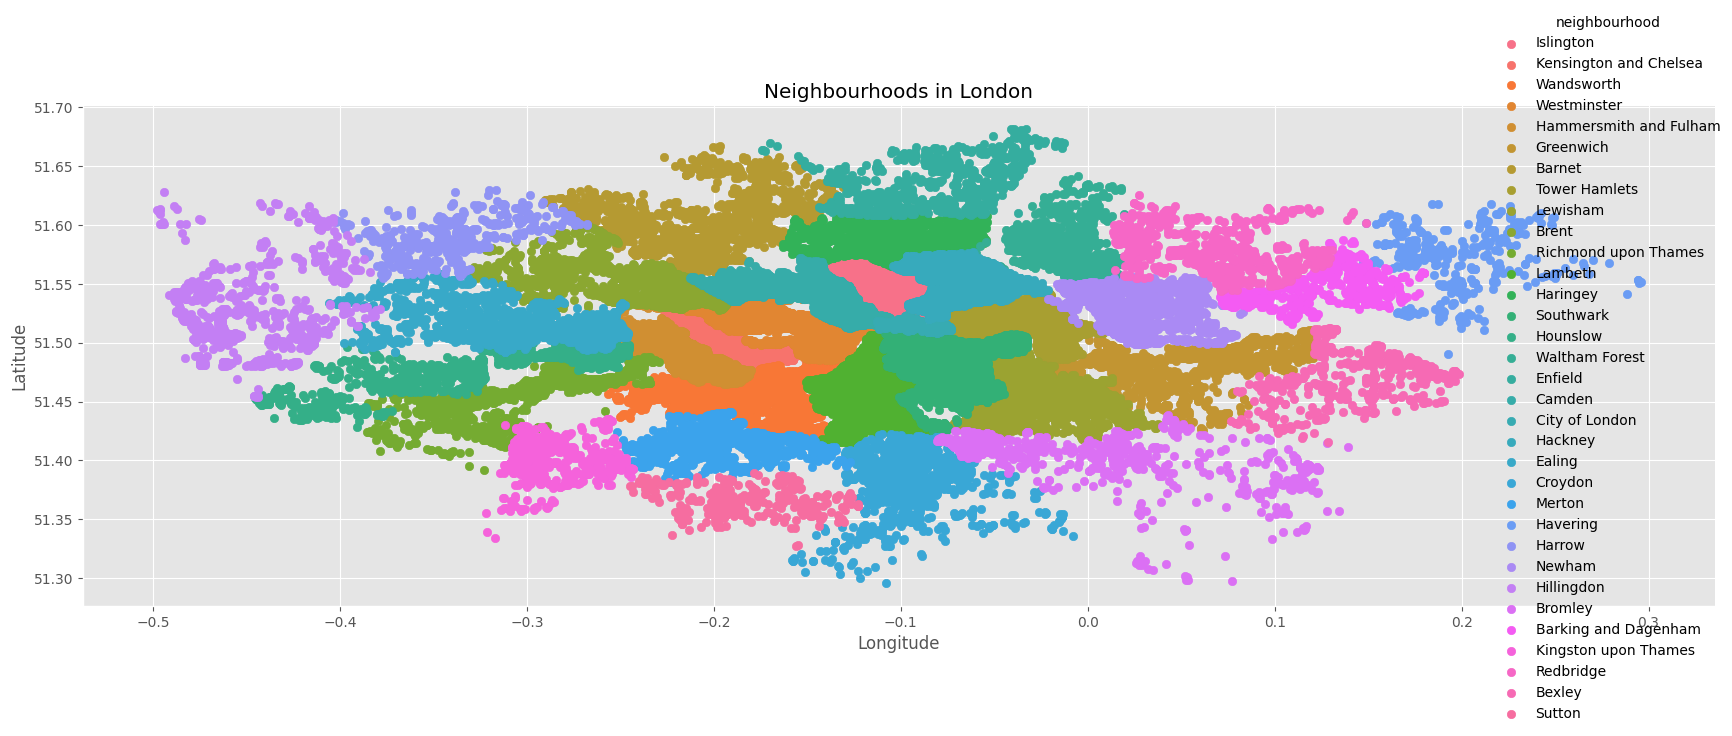

In [ ]:
# g=sns.FacetGrid(data=listing_dv_data,hue='room_type',height=6,aspect=2.5)
# g.map(plt.scatter,'latitude','longitude')
# g.add_legend(loc='upper right')
# plt.tight_layout()
# plt.show()

g = sns.FacetGrid(data=listing_dv_data, hue='neighbourhood', height=6, aspect=2.5)
g.map(plt.scatter, 'longitude', 'latitude').add_legend()

world = gpd.read_file(gpd.datasets.get_path('nybb'))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Neighbourhoods in London')

plt.tight_layout()
plt.show()

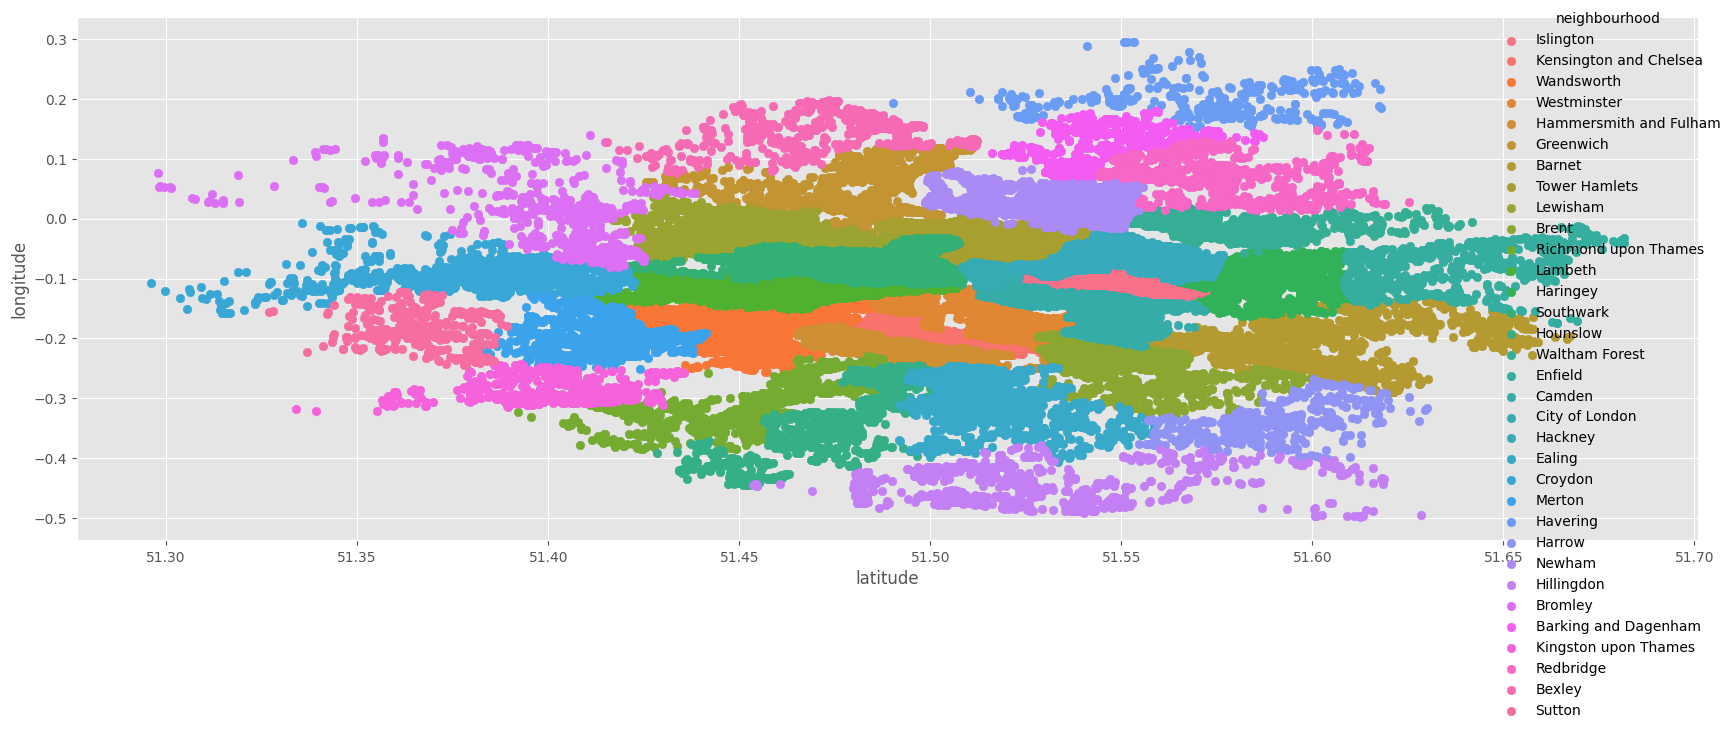

In [ ]:
g=sns.FacetGrid(data=listing_dv_data,hue='neighbourhood',height=6,aspect=2.5)
g.map(plt.scatter,'latitude','longitude')
g.add_legend(loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
neighbourhood_counts=listing_dv_data['neighbourhood'].value_counts().index
neighbourhood_names=listing_dv_data['neighbourhood'].value_counts().values

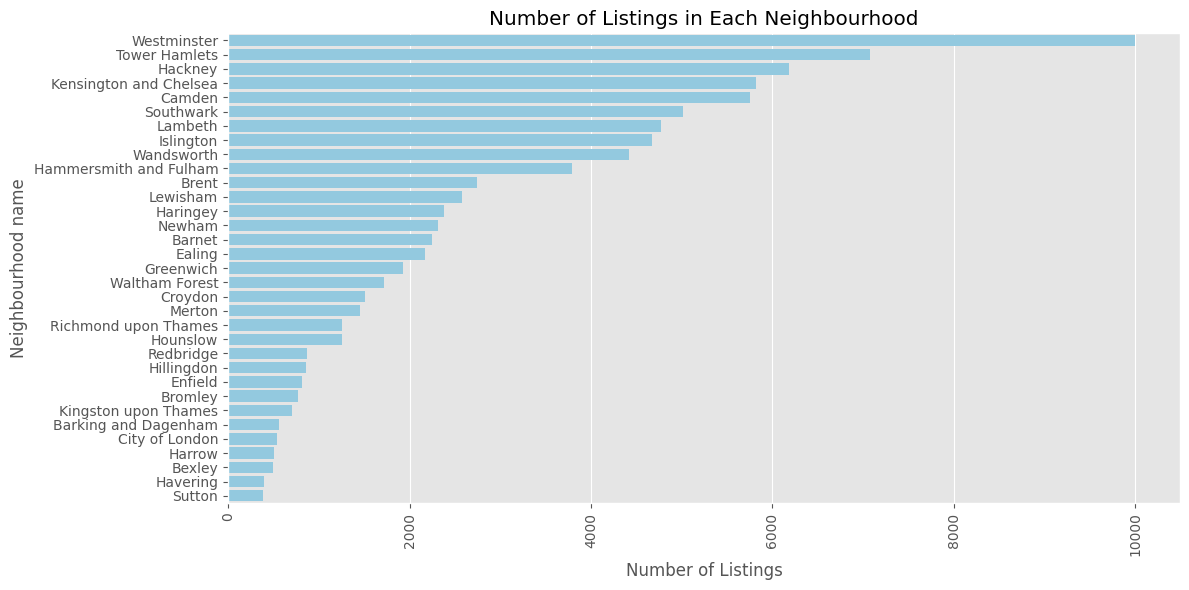

In [ ]:
sns.barplot(x=neighbourhood_names,y=neighbourhood_counts,color='skyblue')
plt.ylabel('Neighbourhood name')
plt.xlabel('Number of Listings')
plt.title('Number of Listings in Each Neighbourhood')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
neighbour_per_mean_df=(100*listing_dv_data['neighbourhood'].value_counts()/len(listing_dv_data)).reset_index().rename(columns={'index':'neighbourhood name','neighbourhood':'percentage share'})


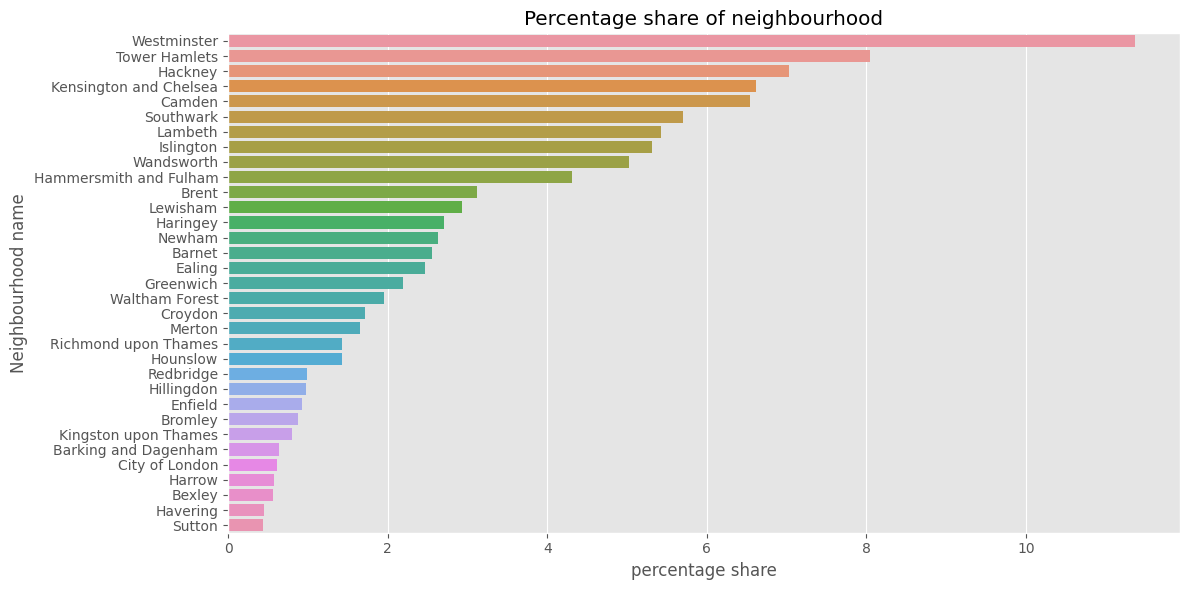

In [ ]:
sns.barplot(x='percentage share',y='neighbourhood name',data=neighbour_per_mean_df)
plt.xlabel('percentage share')
plt.ylabel('Neighbourhood name')
plt.title('Percentage share of neighbourhood')
plt.tight_layout()
plt.show()

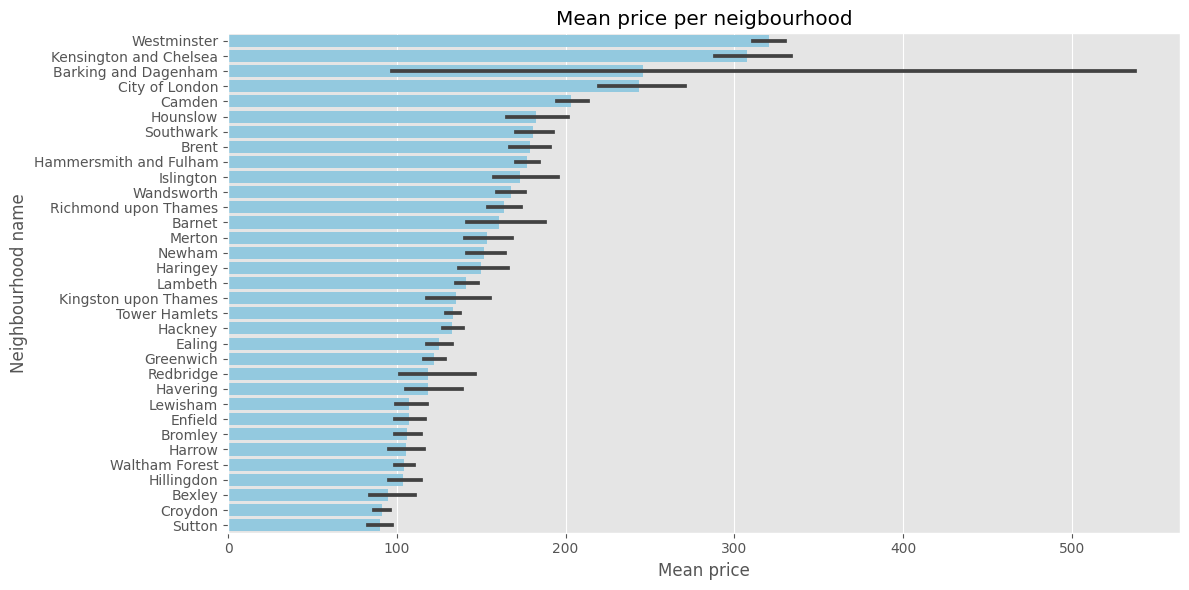

In [ ]:
sns.barplot(x='price',y='neighbourhood',data=listing_dv_data,order=listing_dv_data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).index,color='skyblue')
plt.xlabel('Mean price')
plt.ylabel('Neighbourhood name')
plt.title('Mean price per neigbourhood')
plt.tight_layout()
plt.show()

In [ ]:
listing_dv_data.groupby('neighbourhood')['room_type'].value_counts().unstack().fillna(0)

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Barking and Dagenham,265.0,0.0,294.0,5.0
Barnet,1264.0,4.0,961.0,20.0
Bexley,209.0,0.0,282.0,4.0
Brent,1512.0,0.0,1214.0,14.0
Bromley,404.0,0.0,362.0,6.0
Camden,3901.0,16.0,1809.0,31.0
City of London,471.0,0.0,63.0,2.0
Croydon,737.0,2.0,758.0,9.0
Ealing,1184.0,0.0,974.0,11.0


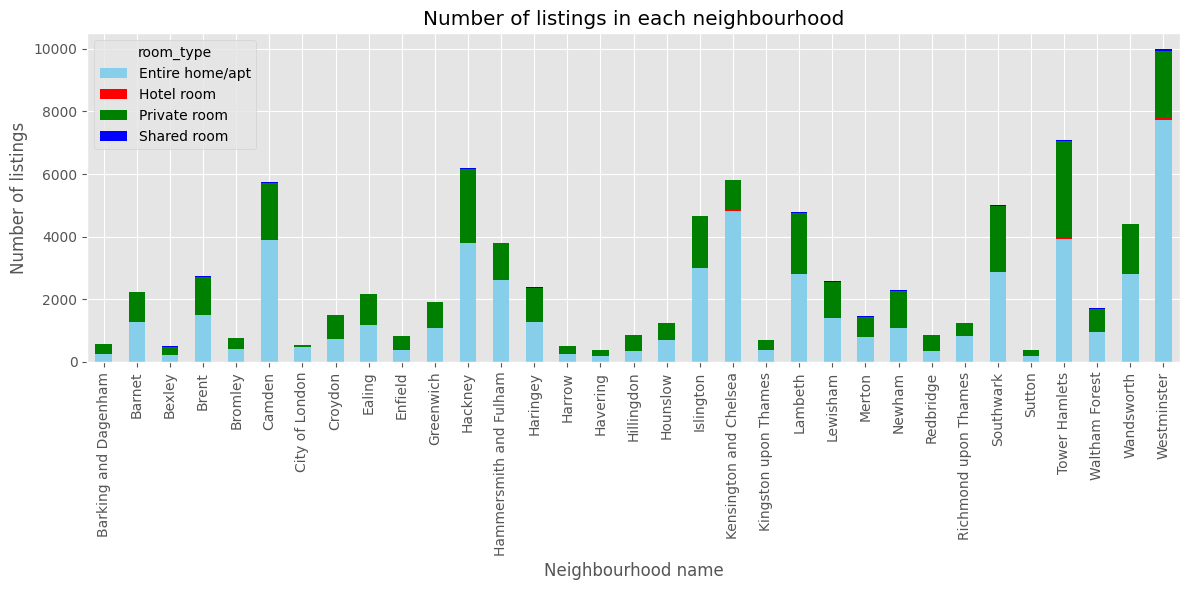

In [ ]:
listing_dv_data.groupby('neighbourhood')['room_type'].value_counts().unstack().fillna(0).plot(kind='bar',stacked=True,color=['skyblue','red','green','blue'])
plt.xlabel('Neighbourhood name')
plt.ylabel('Number of listings')
plt.title('Number of listings in each neighbourhood')
plt.tight_layout()
plt.show()

In [ ]:
def display_room_type(neighbourhood):
  room_type_counts = listing_dv_data.groupby(['neighbourhood', 'room_type'])['room_type'].value_counts().reset_index().rename(columns={'index': 'room_type', 'room_type': 'count'})
  room_type_counts = room_type_counts[room_type_counts['neighbourhood'] == neighbourhood]
  room_type_counts = room_type_counts.sort_values(by='count', ascending=False)
  room_type_counts['percentage'] = (100 * room_type_counts['count'] / room_type_counts['count'].sum())
  return room_type_counts

In [ ]:
# sns.distplot(listing_dv_data['price']),color='skyblue')
# plt.tight_layout()
# plt.show()